In [2]:
from flickplay.get_connections import get_alchemy_con, get_pymysql_con
from flickplay.mongo import get_mongo_db_obj
import pandas as pd
import warnings
import numpy as np
import sys

warnings.filterwarnings("ignore")

con, conp = get_alchemy_con(), get_pymysql_con()
db = get_mongo_db_obj()

In [3]:

conp = get_pymysql_con()

query = """
SELECT event, $user_id, date, time
FROM fpa.events
WHERE 
    event like 'session%' AND
--    event='session__start' OR 
--    event='session__end' AND
    date>='2022-12-1' AND
  --  date<'2023-01-1' AND
    $user_id IS NOT NULL
ORDER BY time asc
"""

dd = pd.read_sql(query, conp).dropna()


In [4]:
uids = list(set(dd['$user_id']))
pd.set_option('display.max_rows', None)
nuids = len(uids)

avg_session_length_by_user, n_sessions_by_user = dict(), dict()

for idx, uid in enumerate(uids):
    sys.stdout.write(f'\r{idx} of {nuids}.')
    lengths = []
    user_dd = dd[dd['$user_id'] == uid].copy()
    
    n_sessions = len(user_dd[user_dd.event=='session__end'])
    
    for idx, row in user_dd.iterrows():
        if row.event == 'session__end':
            try:
                if dd.iloc[idx].at['time'] > dd.iloc[idx-1].at['time'] and dd.iloc[idx-1].at['event'] == 'session__start':
                    
                    session_len = dd.iloc[idx].at['time']- dd.iloc[idx-1].at['time']
                    if not(np.isnan(session_len)):
                        lengths.append(session_len)
            except:
                pass
        
    avg_session_len = np.average(lengths)
    avg_session_length_by_user[uid] = avg_session_len
    n_sessions_by_user[uid] = n_sessions

    
dout = pd.DataFrame()

user_ids, avg_session_lens, n_sessions = [],[],[]

for idx, uid in enumerate(uids):
    user_ids.append(uid)
    avg_session_lens.append(avg_session_length_by_user[uid])
    n_sessions.append(n_sessions_by_user[uid])
    
dout['$user_id'] = user_ids
dout['n_sessions']= n_sessions
dout['avg_session_len'] = [ round(s,1) for s in avg_session_lens ]

dout = dout[dout.n_sessions>=1].sort_values(by='n_sessions', ascending=False).reset_index().drop(columns='index').dropna()

dout.to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/2022-12-session-len.csv',index=False)
dout

# print()
# print('user_id','n_sessions','avg_session_len')

# for idx, row in dout.iterrows():

#     print(row['$user_id'], row.n_sessions, row.avg_session_len)

859 of 860.

,$user_id,n_sessions,avg_session_len
0,609d510c4244340b2a77c83a,366,63.7
1,637563bedf033a9580c865d7,352,43.1
2,6293081e82c92e0a0ca0fd92,296,142.4
3,63316470d7d49d45584ccc5e,294,53.7
4,62c7adc4b8deb3d981f8b8bc,292,95.0
5,62a1e07c309538d8a0a774ce,287,75.7
6,5ee9463955c2ec52d977680a,260,51.4
7,62bf3b0b1cc78f2ab79f7479,250,78.9
8,629fd04337d60d14998feff0,245,57.1
9,62f2b3ed72079b5dd2be6b61,200,42.3


In [5]:

for session_cut in (2,3,5,10,20,30,40,50,100):
    print()
    print('N sessions >= {}'.format(session_cut))
    print(dout[dout.n_sessions>=session_cut].describe())


N sessions >= 2
       n_sessions  avg_session_len
count  282.000000       282.000000
mean    26.879433        66.611348
std     60.453856        75.250712
min      2.000000         2.000000
25%      3.000000        26.000000
50%      4.500000        45.650000
75%     14.000000        78.800000
max    366.000000       632.300000

N sessions >= 3
       n_sessions  avg_session_len
count  215.000000       215.000000
mean    34.632558        66.541395
std     67.414396        74.260153
min      3.000000         3.000000
25%      4.000000        29.400000
50%      7.000000        45.700000
75%     22.000000        75.750000
max    366.000000       632.300000

N sessions >= 5
       n_sessions  avg_session_len
count  141.000000       141.000000
mean    51.021277        62.007092
std     78.490988        42.014844
min      5.000000         5.000000
25%      7.000000        38.000000
50%     14.000000        49.700000
75%     54.000000        77.200000
max    366.000000       218.200000

N s

In [6]:
CUT_MIN=3
cutoff = CUT_MIN*60 # < 5min, 5+ min

dout[dout.avg_session_len>=cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/long_sessions.csv', index=False)

dout[dout.avg_session_len<cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/short_sessions.csv', index=False)

In [7]:
len(dout[dout.avg_session_len<cutoff])

410

In [8]:
db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


In [9]:
ddd = dout
ddd = ddd[ddd['$user_id'].isin(wallet_users) ]
cutoff = CUT_MIN*60 # < 5min, 5+ min

ddd[ddd.avg_session_len>=cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/Web3-Cohort-long_sessions.csv', index=False)

ddd[ddd.avg_session_len<cutoff].to_csv('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/Web3-Cohort-short_sessions.csv', index=False)

In [10]:
print(len(ddd[ddd.avg_session_len<cutoff]))

125


In [11]:
len(ddd)

130

In [12]:
print('Web3 Cohort')
print(ddd[ddd['$user_id'].isin(wallet_users) ].describe())
print()
print('Non-Web3 Cohort')
print(ddd[~ddd['$user_id'].isin(wallet_users) ].describe())
print()


Web3 Cohort
       n_sessions  avg_session_len
count  130.000000       130.000000
mean    44.246154        64.680000
std     76.252138        51.202471
min      1.000000         2.000000
25%      3.000000        32.450000
50%      9.500000        50.050000
75%     42.500000        79.775000
max    366.000000       269.000000

Non-Web3 Cohort
       n_sessions  avg_session_len
count         0.0              0.0
mean          NaN              NaN
std           NaN              NaN
min           NaN              NaN
25%           NaN              NaN
50%           NaN              NaN
75%           NaN              NaN
max           NaN              NaN



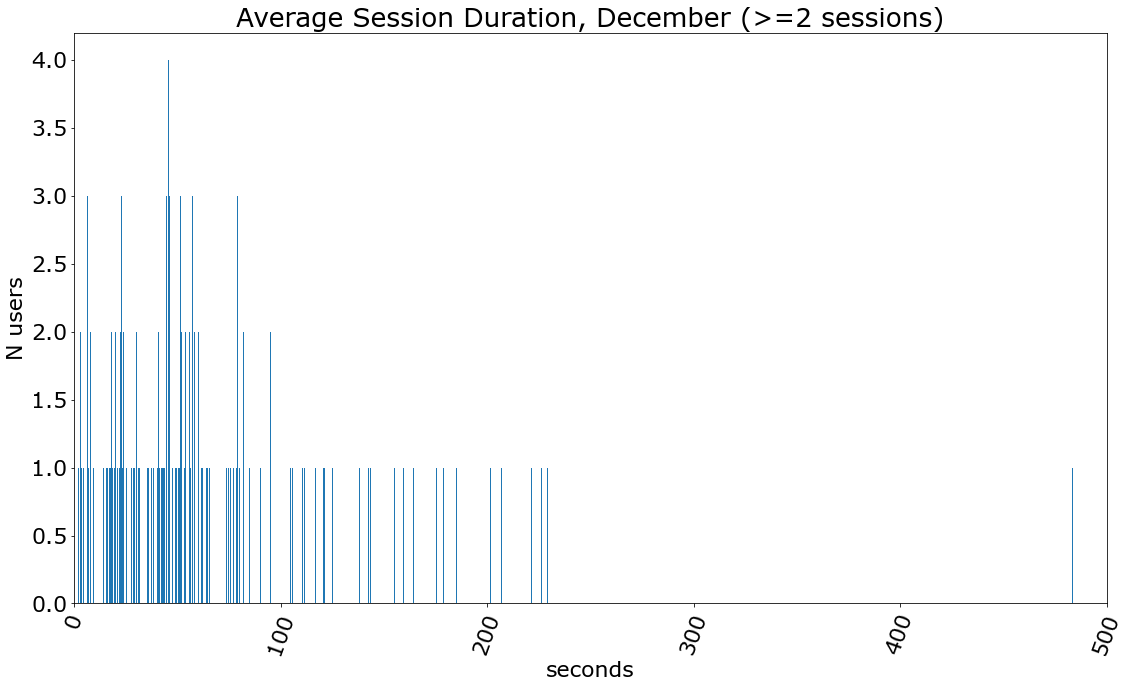

In [13]:

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.hist(dout[dout.n_sessions>=2]['avg_session_len'],bins=3000)
plt.xlim(0, 500)
plt.xticks(rotation=70)
plt.title('Average Session Duration, December (>=2 sessions)')
plt.xlabel('seconds')
plt.ylabel('N users')

plt.savefig('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/session_length.jpg')

plt.show()

In [14]:
len(dout[dout.n_sessions>=2])

282

In [15]:
len(ddd)

130

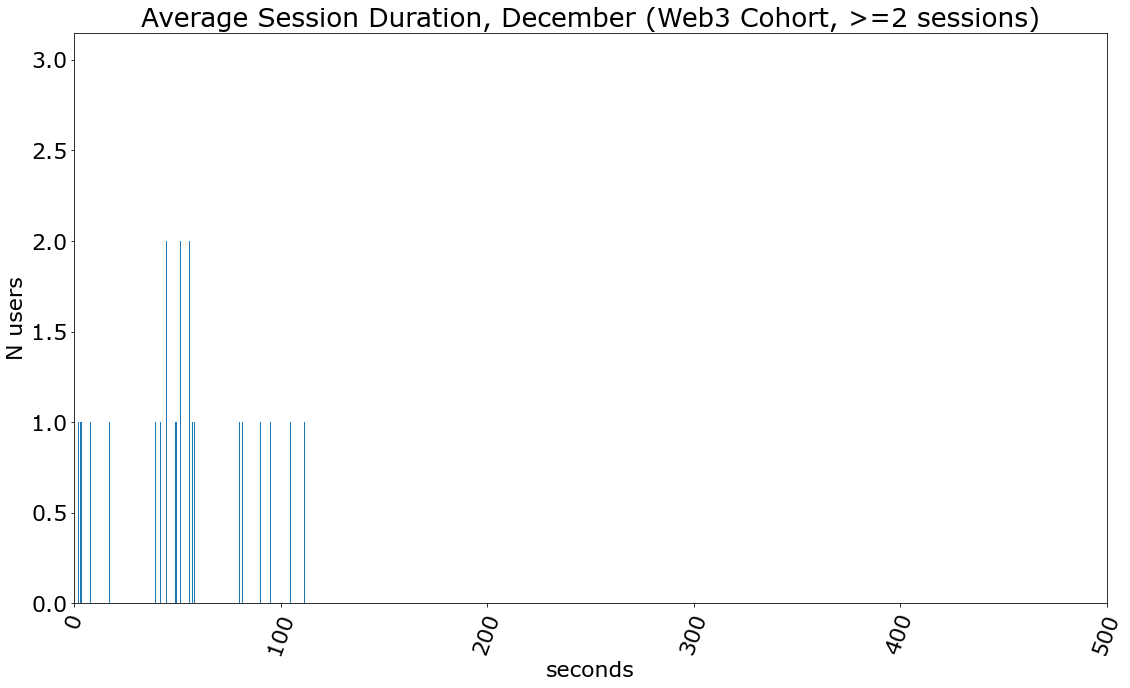

In [16]:
# ddd = dout[dout.n_sessions>=2]
# ddd[ddd['$user_id'].isin(wallet_users) ]

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

plt.hist(ddd[ddd.n_sessions>=2]['avg_session_len'],bins=3000)
plt.xlim(0, 500)
plt.xticks(rotation=70)
plt.title('Average Session Duration, December (Web3 Cohort, >=2 sessions)')
plt.xlabel('seconds')
plt.ylabel('N users')

plt.savefig('/Users/allen/Desktop/clo/flickplay/mixpanel-events/data/Web3-Cohort-session_length.jpg')

plt.show()

In [17]:
# Total MAU:
# # 5>min Users:
# Average session:
# # <5min Users:
# Average session:

In [18]:


cutoff = CUT_MIN*60 # 5 min 

dx = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions')
long = dx[dx.avg_session_len>=cutoff]
short = dx[dx.avg_session_len<cutoff]

print(f'\n>5min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

lsum = 0
lsess_sum = 0
for idx, row in long.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')

print(f'<5min Users:','\n', f'\t{len(short)} users,{round(len(short)/len(dx)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in short.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')


Total MAU: 441 Users, 7739 sessions

>5min Users: 
 	31 users, 7.0% of total MAU.
	Average session duration: 281.9 seconds
	Number of sessions:87 sessions, 1.1% of total sessions
<5min Users: 
 	410 users,93.0% of total MAU.
	Average session duration: 63.1 seconds
	Number of sessions: 7652 sessions, 98.9% of total sessions


In [20]:
total_time = []


for idx, row in dout.iterrows():
    total_time.append(row.n_sessions*row.avg_session_len)
    
dout['screen_time_hr'] = [ round(x/60**2,1) for x in total_time ]
# dout[dout['$user_id'] == 

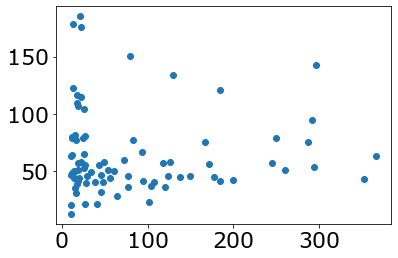

In [23]:
d = dout[dout.avg_session_len <= 1000]
d = d[d.n_sessions>10]

xs = d['n_sessions'].values
ys = d['avg_session_len'].values

X = [ _ for _ in xs ]
logX = [  np.log(_) for _ in X ]
y = [ _ for _ in ys ]
logy = [ np.log(_) for _ in y ]

plt.scatter(X, y)

In [24]:
# Total MAU:
# # Web3 Users:
# Average session:
# # Other Users:
# Average session:

db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


dw = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dw.screen_time_hr),1)} hours')
w3 = dw[dw['$user_id'].isin(wallet_users)]
nw3 = dw[~dw['$user_id'].isin(wallet_users)]
total_screen_time = sum(dw.screen_time_hr)

print(f'\nWeb3 Cohort:','\n', f'\t{len(w3)} users, {round(len(w3)/len(dw)*100,1)}% of total MAU')
print(f'{round(sum(w3.screen_time_hr),1)} hours, {round(sum(dw.screen_time_hr)/sum(dw.screen_time_hr)*100,1)}% of total {round(sum(dw.screen_time_hr),1)} hours')

lsum = 0
lsess_sum = 0
for idx, row in w3.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(w3.n_sessions),1), 'seconds')
# print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
long,short=w3,nw3
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())
print()
print(f'\nNon-Web3 Cohort:','\n', f'\t{len(nw3)} users,{round(len(nw3)/len(dw)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in nw3.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())



# cutoff = 5*60 # 5 min 

# dx = d.copy()#dout[dout.n_sessions>=0].copy()
# total_n_sess = sum(dout.n_sessions)
# print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)} hours')
# long = dx[dx.avg_session_len>=cutoff]
# short = dx[dx.avg_session_len<cutoff]
# total_screen_time = sum(dx.screen_time_hr)

# print(f'\n>5min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

# lsum = 0
# lsess_sum = 0
# for idx, row in long.iterrows():
#     lsum+=row.n_sessions*row.avg_session_len 
#     lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
# print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
# print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
# print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
# print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
# print()
# print(long.describe())

# print('='*80)
# print()
# print(f'<5min Users:','\n', f'\t{len(short)} users, {round(len(short)/len(dx)*100,1)}% of total MAU.')
# ssum = 0
# ssess_sum=0
# sess_total_time=0

# for idx, row in short.iterrows():
#     ssum+=row.n_sessions*row.avg_session_len 
#     ssess_sum+=row.n_sessions
# print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
# print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
# print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
# print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
# print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
# print()
# print(short.describe())

Total MAU: 441 Users, 7739 sessions, 138.3 hours

Web3 Cohort: 
 	130 users, 29.5% of total MAU
110.8 hours, 100.0% of total 138.3 hours
	Average session duration: 69.4 seconds
	Average number of sessions: 44.2 sessions
	Average screen time: 0.9 hours
	Total Number of sessions: 5752 sessions, 74.3% of total sessions
	Total screen time: 110.8 hours 80.1% of the total 138.3 hours.

       n_sessions  avg_session_len  screen_time_hr
count  130.000000       130.000000      130.000000
mean    44.246154        64.680000        0.852308
std     76.252138        51.202471        1.744325
min      1.000000         2.000000        0.000000
25%      3.000000        32.450000        0.000000
50%      9.500000        50.050000        0.200000
75%     42.500000        79.775000        0.700000
max    366.000000       269.000000       11.700000


Non-Web3 Cohort: 
 	311 users,70.5% of total MAU.
	Average session duration: 54.5 seconds
	Average number of sessions: 6.4 sessions
	Average screen time: 0.

In [25]:


cutoff = 5*60 # 5 min 

dx = d.copy()#dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)} hours')
long = dx[dx.avg_session_len>=cutoff]
short = dx[dx.avg_session_len<cutoff]
total_screen_time = sum(dx.screen_time_hr)

print(f'\n>5min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

lsum = 0
lsess_sum = 0
for idx, row in long.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())

print('='*80)
print()
print(f'<5min Users:','\n', f'\t{len(short)} users, {round(len(short)/len(dx)*100,1)}% of total MAU.')
ssum = 0
ssess_sum=0
sess_total_time=0

for idx, row in short.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())

# Total MAU:
# # Web3 Users:
# Average session:
# # Other Users:
# Average session:

db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


dw = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dw.screen_time_hr),1)} hours')
w3 = dw[dw['$user_id'].isin(wallet_users)]
nw3 = dw[~dw['$user_id'].isin(wallet_users)]
total_screen_time = sum(dw.screen_time_hr)

print(f'\nWeb3 Cohort:','\n', f'\t{len(w3)} users, {round(len(w3)/len(dw)*100,1)}% of total MAU')
print(f'{round(sum(w3.screen_time_hr),1)} hours, {round(sum(dw.screen_time_hr)/sum(dw.screen_time_hr)*100,1)}% of total {round(sum(dw.screen_time_hr),1)} hours')

lsum = 0
lsess_sum = 0
for idx, row in w3.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(w3.n_sessions),1), 'seconds')
# print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
long,short=w3,nw3
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())
print()
print(f'\nNon-Web3 Cohort:','\n', f'\t{len(nw3)} users,{round(len(nw3)/len(dw)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in nw3.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())



# cutoff = 5*60 # 5 min 

# dx = d.copy()#dout[dout.n_sessions>=0].copy()
# total_n_sess = sum(dout.n_sessions)
# print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)}

Total MAU: 441 Users, 7739 sessions, 122.9 hours

>5min Users: 
 	0 users, 0.0% of total MAU.


ZeroDivisionError: division by zero

In [ ]:
d[d['$user_id']=='637563bedf033a9580c865d7']

In [26]:
# % of users who have N or fewer sessions

n_pops = dict() # population of users who have (key) number of sessions in november
n_session_max = max(dout.n_sessions)
n_total_sesh = sum(dout.n_sessions)

print(n_session_max)
print(n_total_sesh)

for n in range(1,100):
    N_users = len(dout[dout.n_sessions==n])
    n_pops[n] = N_users
    user_pct = round(N_users/len(dout)*100,1)
    sesh_pct = round(N_users*n/n_total_sesh*100,1)
    print(f'{N_users} users have {n} sessions, \n\t{user_pct}% of the total {len(dout)} MAU \t\t{sesh_pct}% of the {total_n_sess} sessions.')

366
7739
159 users have 1 sessions, 
	36.1% of the total 441 MAU 		2.1% of the 7739 sessions.
67 users have 2 sessions, 
	15.2% of the total 441 MAU 		1.7% of the 7739 sessions.
44 users have 3 sessions, 
	10.0% of the total 441 MAU 		1.7% of the 7739 sessions.
30 users have 4 sessions, 
	6.8% of the total 441 MAU 		1.6% of the 7739 sessions.
16 users have 5 sessions, 
	3.6% of the total 441 MAU 		1.0% of the 7739 sessions.
17 users have 6 sessions, 
	3.9% of the total 441 MAU 		1.3% of the 7739 sessions.
8 users have 7 sessions, 
	1.8% of the total 441 MAU 		0.7% of the 7739 sessions.
5 users have 8 sessions, 
	1.1% of the total 441 MAU 		0.5% of the 7739 sessions.
7 users have 9 sessions, 
	1.6% of the total 441 MAU 		0.8% of the 7739 sessions.
6 users have 10 sessions, 
	1.4% of the total 441 MAU 		0.8% of the 7739 sessions.
4 users have 11 sessions, 
	0.9% of the total 441 MAU 		0.6% of the 7739 sessions.
4 users have 12 sessions, 
	0.9% of the total 441 MAU 		0.6% of the 7739 sess

In [27]:
total_time = []


for idx, row in dout.iterrows():
    total_time.append(row.n_sessions*row.avg_session_len)
    
dout['screen_time_hr'] = [ round(x/60**2,1) for x in total_time ]
# dout[dout['$user_id'] == 

In [28]:
d = dout.copy()


CUT_MIN=3
cutoff = CUT_MIN*60 # 3 min 

dx = d.copy()#dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)} hours')
long = dx[dx.avg_session_len>=cutoff]
short = dx[dx.avg_session_len<cutoff]
total_screen_time = sum(dx.screen_time_hr)

print(f'\n>{CUT_MIN}min Users:','\n', f'\t{len(long)} users, {round(len(long)/len(dx)*100,1)}% of total MAU.')

lsum = 0
lsess_sum = 0
for idx, row in long.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())

print('='*80)
print()
print(f'<{CUT_MIN}min Users:','\n', f'\t{len(short)} users, {round(len(short)/len(dx)*100,1)}% of total MAU.')
ssum = 0
ssess_sum=0
sess_total_time=0

for idx, row in short.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())

# Total MAU:
# # Web3 Users:
# Average session:
# # Other Users:
# Average session:

db = get_mongo_db_obj()

wallet_users = [ str(w['user']) for w in db.wallets.find() ]


dw = dout[dout.n_sessions>=0].copy()
total_n_sess = sum(dout.n_sessions)
print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dw.screen_time_hr),1)} hours')
w3 = dw[dw['$user_id'].isin(wallet_users)]
nw3 = dw[~dw['$user_id'].isin(wallet_users)]
total_screen_time = sum(dw.screen_time_hr)

print(f'\nWeb3 Cohort:','\n', f'\t{len(w3)} users, {round(len(w3)/len(dw)*100,1)}% of total MAU')
print(f'{round(sum(w3.screen_time_hr),1)} hours, {round(sum(dw.screen_time_hr)/sum(dw.screen_time_hr)*100,1)}% of total {round(sum(dw.screen_time_hr),1)} hours')

lsum = 0
lsess_sum = 0
for idx, row in w3.iterrows():
    lsum+=row.n_sessions*row.avg_session_len 
    lsess_sum+=row.n_sessions
    
# print('\tAverage session duration:',round(lsum/sum(w3.n_sessions),1), 'seconds')
# print(f'\tNumber of sessions:{lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
long,short=w3,nw3
print('\tAverage session duration:',round(lsum/sum(long.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(long.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(long.screen_time_hr.mean(),1), 'hours')
print(f'\tTotal Number of sessions: {lsess_sum} sessions, {round(lsess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(long.screen_time_hr),1) , 'hours', f'{round(sum(long.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(long.describe())
print()
print(f'\nNon-Web3 Cohort:','\n', f'\t{len(nw3)} users,{round(len(nw3)/len(dw)*100,1)}% of total MAU.')

ssum = 0
ssess_sum=0
for idx, row in nw3.iterrows():
    ssum+=row.n_sessions*row.avg_session_len 
    ssess_sum+=row.n_sessions
print('\tAverage session duration:',round(ssum/sum(short.n_sessions),1), 'seconds')
print('\tAverage number of sessions:', round(short.n_sessions.mean(),1), 'sessions')
print('\tAverage screen time:', round(short.screen_time_hr.mean(),1), 'hours')
print(f'\tNumber of sessions: {ssess_sum} sessions, {round(ssess_sum/total_n_sess*100,1)}% of total sessions')
print(f'\tTotal screen time:', round(sum(short.screen_time_hr),1) , 'hours', f'{round(sum(short.screen_time_hr)/total_screen_time*100,1)}% of the total {round(total_screen_time,1)} hours.')
print()
print(short.describe())



# cutoff = 5*60 # 5 min 

# dx = d.copy()#dout[dout.n_sessions>=0].copy()
# total_n_sess = sum(dout.n_sessions)
# print(f'Total MAU: {len(dout)} Users, {total_n_sess} sessions, {round(sum(dx.screen_time_hr),1)}

Total MAU: 441 Users, 7739 sessions, 138.3 hours

>3min Users: 
 	31 users, 7.0% of total MAU.
	Average session duration: 281.9 seconds
	Average number of sessions: 2.8 sessions
	Average screen time: 0.2 hours
	Total Number of sessions: 87 sessions, 1.1% of total sessions
	Total screen time: 7.4 hours 5.4% of the total 138.3 hours.

       n_sessions  avg_session_len  screen_time_hr
count   31.000000        31.000000       31.000000
mean     2.806452       325.600000        0.238710
std      3.754281       192.745331        0.227563
min      1.000000       185.200000        0.100000
25%      1.000000       208.000000        0.100000
50%      1.000000       257.000000        0.200000
75%      3.000000       335.000000        0.300000
max     21.000000      1068.000000        1.100000

<3min Users: 
 	410 users, 93.0% of total MAU.
	Average session duration: 63.1 seconds
	Average number of sessions: 18.7 sessions
	Average screen time: 0.3 hours
	Number of sessions: 7652 sessions, 98.9% o

In [30]:
dout.sort_values(by='screen_time_hr', ascending=False)

,$user_id,n_sessions,avg_session_len,screen_time_hr
2,6293081e82c92e0a0ca0fd92,296,142.4,11.7
4,62c7adc4b8deb3d981f8b8bc,292,95.0,7.7
0,609d510c4244340b2a77c83a,366,63.7,6.5
11,6262b5ce801ba557543ac90a,184,120.6,6.2
5,62a1e07c309538d8a0a774ce,287,75.7,6.0
7,62bf3b0b1cc78f2ab79f7479,250,78.9,5.5
17,62d2778ac412cd75e151c01d,129,134.0,4.8
3,63316470d7d49d45584ccc5e,294,53.7,4.4
1,637563bedf033a9580c865d7,352,43.1,4.2
8,629fd04337d60d14998feff0,245,57.1,3.9


In [29]:
dout

,$user_id,n_sessions,avg_session_len,screen_time_hr
0,609d510c4244340b2a77c83a,366,63.7,6.5
1,637563bedf033a9580c865d7,352,43.1,4.2
2,6293081e82c92e0a0ca0fd92,296,142.4,11.7
3,63316470d7d49d45584ccc5e,294,53.7,4.4
4,62c7adc4b8deb3d981f8b8bc,292,95.0,7.7
5,62a1e07c309538d8a0a774ce,287,75.7,6.0
6,5ee9463955c2ec52d977680a,260,51.4,3.7
7,62bf3b0b1cc78f2ab79f7479,250,78.9,5.5
8,629fd04337d60d14998feff0,245,57.1,3.9
9,62f2b3ed72079b5dd2be6b61,200,42.3,2.4
